### Q: Is there a higher proportion of Esr1 positive cells in the MPN compared to the brain-wide average?

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = "E:registration_workshop/5_exported_cell_registrations/brain1.feather"
df = pd.read_feather(filename)
df.head()

,Class,X,Y,Z,Esr1 (Opal 480): Num Spots,Prg (Opal 520): Num Spots,Prlr (Opal 570): Num Spots,Oxt (Opal 620): Num Spots,Acronym,BrainRegion,Image
0,Positive,3.1363,2.2320,2.9190,21,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
1,Positive,3.1365,2.1999,2.9437,8,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
2,Positive,3.1365,2.1906,2.9545,8,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
3,Positive,3.1365,2.1742,2.9655,16,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv
4,Positive,3.1365,2.1650,2.9771,4,0,0,0,NaN,NaN,PW166-A05_Scan1_Region1.tsv


In [5]:
df.Class.value_counts(normalize=True)

Positive    0.990249
Negative    0.009751
Name: Class, dtype: float64

(0.0, 200.0)

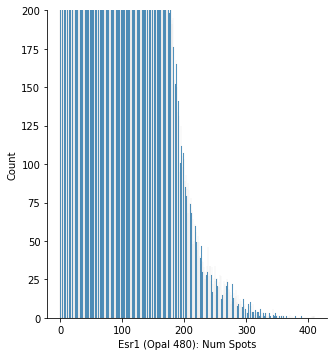

In [83]:
sns.displot(df['Esr1 (Opal 480): Num Spots'])
plt.ylim(top=200)

In [7]:
df_cleaned = df[df.Class == 'Positive']
df_cleaned.Class.value_counts(normalize=True)

Positive    1.0
Name: Class, dtype: float64

In [32]:
dd = df_cleaned[df_cleaned['Esr1 (Opal 480): Num Spots'] < 150].copy()

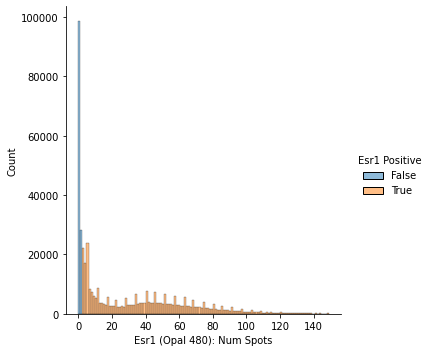

In [75]:
positive_threshold = 2
dd['Esr1 Positive'] = dd['Esr1 (Opal 480): Num Spots'] > positive_threshold
sns.displot(data=dd.sample(frac=.1), hue='Esr1 Positive', x='Esr1 (Opal 480): Num Spots');

Esr1 Positive,False,True
isMPN,,
False,0.278522,0.721478
True,0.000644,0.999356


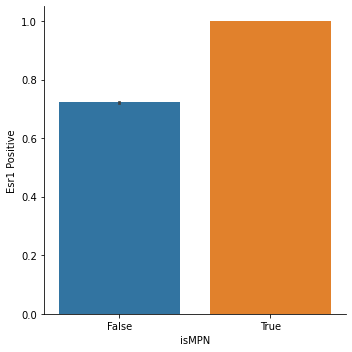

In [76]:
dd['isMPN'] = dd['Acronym'] == 'MPN'
sns.catplot(data=dd.sample(frac=.05), x='isMPN', y='Esr1 Positive', kind='bar', estimator=np.mean)
dd.groupby('isMPN')['Esr1 Positive'].value_counts(normalize=True).unstack()

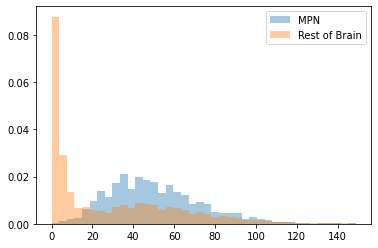

In [74]:
plt.hist(dd[dd['isMPN']]['Esr1 (Opal 480): Num Spots'], density=True, bins=40, alpha=.4, label='MPN');
plt.hist(dd[dd['isMPN'] == False]['Esr1 (Opal 480): Num Spots'], density=True, bins=40, alpha=.4, label='Rest of Brain');
plt.legend()

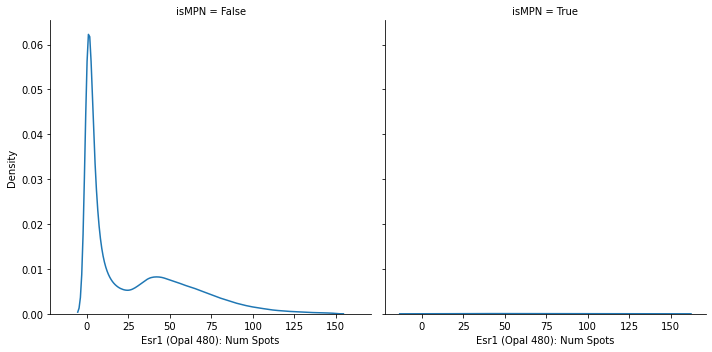

In [66]:
sns.displot(data=dd.sample(frac=.3), col='isMPN', x='Esr1 (Opal 480): Num Spots',kind='kde');

In [35]:
df_cleaned['Acronym'].isna().mean()

0.042035784644024285

In [36]:
dd['Acronym'].isna().mean()

0.04204776781039096